# Predicting Grad School Admission with Logistic Regression

A simple implementation of logistic regression for machine learning in Python to create a model that predicts the admission of candidates into graduate schools. 

Uses data from UCLA. Credit to the examples from yhat at http://blog.yhat.com/posts/logistic-regression-and-python.html and dataschool at http://nbviewer.jupyter.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976 for being starting points and good guides (though the examples are not strictly followed).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

## The Dataset

The data from UCLA (found at http://www.ats.ucla.edu/stat/data/binary.csv and originally used in this example: http://www.ats.ucla.edu/stat/r/dae/logit.htm) contains 4 columns:
* admit - a binary variable describing if the student was admitted into grad school or not
* gre - the student's Graduate Record Examination (GRE) score
* gpa - the student's grade point average (GPA)
* rank - the prestige of the student's undergraduate school, ranked from 1 to 4

The columns will be renamed to "Admit," "GRE," "GPA," and "Prestige" as we import the data to make them more human-friendly. Note that "rank" is renamed to "Prestige" to avoid confusion with a method of pandas.

In [2]:
# As we import the data, we rename the "Rank" column to "Prestige" to avoid confusion with the rank method of pandas
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv", header = 0, names = ["Admit", 'GRE', 'GPA', 'Prestige'])
df.head()

,Admit,GRE,GPA,Prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Initial Exploratory Data Analysis

We take a look at basic summary statistics, a cross-tabulation, and a histogram to get a general idea of the contents of the data.

In [3]:
# Basic summary of the data
df.describe()

,Admit,GRE,GPA,Prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [4]:
# Generate a cross-tabulation (frequency table by default) of the factors; here we use prestige
pd.crosstab(df['Admit'], df['Prestige'], rownames=['Admission'])

Prestige,1,2,3,4
Admission,,,,
0,28,97,93,55
1,33,54,28,12


Based on the cruss-tabulation above, it appears that prestige is a significant factor in admission, with those in schools of rank 1 having more admits than not, and those from schools of rank 4 being largely rejected.

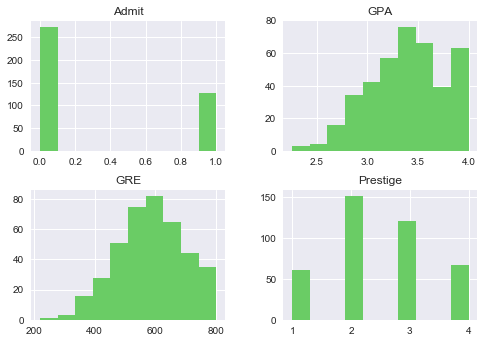

In [5]:
# Generate histograms
sns.set_color_codes('muted')
df.hist(color='g')
plt.show()

## Preprocessing the Data

While the data is already very analysis-friendly, we still have to change the categorial variable (prestige) into a binary one to be able to create a logistic regression model.

In [6]:
# Dummy code the rank variable
dummy_ranks = pd.get_dummies(df['Prestige'], prefix="Prestige")
dummy_ranks.head()

,Prestige_1,Prestige_2,Prestige_3,Prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


Given that prestige is a categorical value, we perform dummy coding to convert the values into binary variables.

In [7]:
columns1 = ['Admit', 'GRE', 'GPA']
data1 = df[columns1]
columns2 = ['Prestige_1','Prestige_2','Prestige_3']
data2 = dummy_ranks[columns2]
data = pd.merge(data1, data2, how="outer", left_index=True, right_index=True)
data

,Admit,GRE,GPA,Prestige_1,Prestige_2,Prestige_3
0,0,380,3.61,0.0,0.0,1.0
1,1,660,3.67,0.0,0.0,1.0
2,1,800,4.00,1.0,0.0,0.0
3,1,640,3.19,0.0,0.0,0.0
4,0,520,2.93,0.0,0.0,0.0
5,1,760,3.00,0.0,1.0,0.0
6,1,560,2.98,1.0,0.0,0.0
7,0,400,3.08,0.0,1.0,0.0
8,1,540,3.39,0.0,0.0,1.0
9,0,700,3.92,0.0,1.0,0.0


## Logistic Regression

We will use logistic regression to predict the probability that a particular student gets into grad school.

In [8]:
# Separate independent and dependent variables
X = data.ix[:,1:]
y = data['Admit']

# Create a logistic regression model
initial = LogisticRegression(C = 1000, random_state=0)
initial.fit(X,y)

# Check model accuracy
print("Accuracy Score:", initial.score(X,y))

Accuracy Score: 0.7075


In [9]:
# What percentage of students actually got into grad school
print("Actual probability of admission:", y.mean())

Actual probability of admission: 0.3175


If you were guessing "no," you would be right around 68.25% of the time. Our model is more accurate than just guessing "no" by around 2.5%.

Our model is significantly better than random guessing. To be more precise, it is about 20.75% better than just guessing 50/50.

In [10]:
# View coefficients
column_names = list(X.columns)
coefficients = np.transpose(initial.coef_)

intercept = initial.intercept_

Coeffs = pd.DataFrame(coefficients, column_names, columns=['Coefficients'])
Coeffs.append(pd.DataFrame(intercept,['Intercept'], columns=['Coefficients']))

,Coefficients
GRE,0.002228
GPA,0.803450
Prestige_1,1.508653
Prestige_2,0.842366
Prestige_3,0.186982
Intercept,-5.488024


The coefficients above are telling of the value of the data in the dataset.

Every additional point in a candidate's GRE score improves their chance of admission by 0.002; every unit increase in GPA increases a candidate's chance by 0.803.

The prestige coefficients are interpreted as showing that being from a school of rank 1 increases your chance of going to grad school by 1.509 versus a student from a rank 4 school. Differences in chances can be determined by subtracting the prestige 1 coefficient from the prestige coefficient of another rank, e.g., being from a school of rank 1 increases your chance of admission by around 0.6662 (calculated from 1.508653-0.842366) versus a student from a rank 2 school.

It is important to note that the information mentioned regarding the log odds is contextual to our model.

## Modeling Using a Training and a Test Set

In the real world, we will likely need to create a machine learning model that can take any set of predictor variables and spit out a probability of admission, which means we won't have the privilege of creating a logit model based on an entirely known set of data.

We will now create a logistic regression model based on one training set and one test set, with 70% of the data going into the training set and 30% going into the test set, in order to be able to construct a model and test its accuracy on data that was not used to create it.

In [11]:
# Split data into training and test sets, using 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fit the logistic regression with lambda = 10^-3
lr = LogisticRegression(C = 1000, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# View predictions
predicted = lr.predict(X_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [13]:
# View class probabilities
probabilities = lr.predict_proba(X_test)
print(probabilities)

[[ 0.64022421  0.35977579]
 [ 0.84820859  0.15179141]
 [ 0.85828566  0.14171434]
 [ 0.80578176  0.19421824]
 [ 0.62378498  0.37621502]
 [ 0.6623231   0.3376769 ]
 [ 0.87367562  0.12632438]
 [ 0.70875513  0.29124487]
 [ 0.79898042  0.20101958]
 [ 0.61110878  0.38889122]
 [ 0.84350899  0.15649101]
 [ 0.70817595  0.29182405]
 [ 0.48183441  0.51816559]
 [ 0.68963801  0.31036199]
 [ 0.32143748  0.67856252]
 [ 0.87409495  0.12590505]
 [ 0.31613189  0.68386811]
 [ 0.54269812  0.45730188]
 [ 0.39399235  0.60600765]
 [ 0.79424349  0.20575651]
 [ 0.75798685  0.24201315]
 [ 0.60557388  0.39442612]
 [ 0.69810048  0.30189952]
 [ 0.80157962  0.19842038]
 [ 0.63457754  0.36542246]
 [ 0.81654046  0.18345954]
 [ 0.51421484  0.48578516]
 [ 0.79934062  0.20065938]
 [ 0.42776407  0.57223593]
 [ 0.86423849  0.13576151]
 [ 0.80606385  0.19393615]
 [ 0.52385954  0.47614046]
 [ 0.78174081  0.21825919]
 [ 0.74683181  0.25316819]
 [ 0.60653022  0.39346978]
 [ 0.79349638  0.20650362]
 [ 0.54235013  0.45764987]
 

## Model Evaluation

We now evaluate our logistic regression using some common metrics for assessing model quality.

In [14]:
# Check accuracy
print("Accuracy Score:", metrics.accuracy_score(y_test, predicted))

Accuracy Score: 0.708333333333


The accuracy score here is slightly (around 0.083%) better than the optimized logistic regression without the training/test split.

Using a well-chosen (completely random) subset of the data, we were able to create a model whose accuracy actually exceeded that of the model created using all of the data.

### Performance Visualization

We use a confusion matrix, classification report, and ROC curve to get a better view of the performance of our model.

In [15]:
# Print confusion matrix and classification report
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n",metrics.classification_report(y_test,predicted))

Confusion Matrix:
 [[77  5]
 [30  8]]

Classification Report:
              precision    recall  f1-score   support

          0       0.72      0.94      0.81        82
          1       0.62      0.21      0.31        38

avg / total       0.69      0.71      0.66       120



The confusion matrix shows that out of 82 non-admits, our model got 77 of those right, while 5 of those were false positives. This very good hit rate for 0's is  reflected in the high recall of 0.94 for 0's in the classification report. However, the performance of the model is not as good at predicting admits, with only 8 out of 38 admissions correctly being predicted by the model. Again, this is reflected in the low recall 0.21 for 1's.

Looking at precision, 72% of 0's are indeed 0's, and 62% of identified 1's are actual 1's.

In total, 85 out of 120 results were correctly predicted by the model.

#### Plotting the ROC Curve

In order to more ably visualize the effectiveness of our model and support our existing analysis, we use an ROC curve. While scikit-learn already selects a certain balance (0.5 by default for binary classifiers; can be adjusted via the class_weight argument in LogisticRegression) of performance metrics (precision, recall, etc.), it is still good to get a view of the performance tradeoffs inherent in our model, as well as to gain insight for potential model tuning in the future.

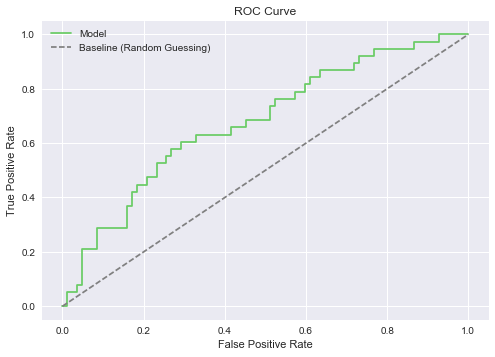

Area Under the Curve: 0.678433889602


In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities[:,1])

results = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

plt.plot(fpr,tpr, color='g', label="Model")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline (Random Guessing)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("Area Under the Curve:", metrics.roc_auc_score(y_test, probabilities[:,1]))

As the plot above shows, while our logistic regression model is not really that good -- the area under the curve is calculated to be 0.6784 -- in accordance with the results earlier, it still does better than random guessing.

Also note that, in alignment with the 0.5 threshhold used by scikit-learn by default, our true positive rate (recall) of 0.71 matches up with the true positive rate in the graph when the false positive rate is 0.5.

### Checking Model Prediction Performance

We assess the quality our modeling above -- specifically, how effectively it will likely hold up when exponsed to unseen data -- by using cross-validation. 

In [17]:
fivefold = cross_val_score(lr, X, y, scoring='accuracy', cv=5)
print("Score per fold:", fivefold)
print("Mean score:", fivefold.mean())
print("Standard deviation:", fivefold.std())

Score per fold: [ 0.69135802  0.75308642  0.7         0.6835443   0.6835443 ]
Mean score: 0.702306610408
Standard deviation: 0.0261068164148


Using five-fold cross-validation on our current model results in a similar accuracy score as the one previously derived, which shows that the model we arrived at earlier is not biased toward the training set and will likely generalize well to new data.

## Improving the Model

We will attempt to improve our model by using a variety of techniques, including feature scaling, class weighting, and tuning our hyperparameter C. Our current model will be treated as a baseline.

### Feature Scaling

One aspect of our data is that GRE and GPA scores vary significantly in scale. Scaling these features may improve the accuracy of our machine learning model.

In [18]:
from sklearn import preprocessing

# Isolate columns to scale
toscale = X.loc[:,'GRE':'GPA']
scaleddata = preprocessing.scale(toscale)
scaleddata = pd.DataFrame(scaleddata, columns=['GRE','GPA'])

# Join scaled data with categorical rank columns
scaledX = scaleddata.join(data2)
scaledX.head()

,GRE,GPA,Prestige_1,Prestige_2,Prestige_3
0,-1.800263,0.579072,0.0,0.0,1.0
1,0.626668,0.736929,0.0,0.0,1.0
2,1.840134,1.605143,1.0,0.0,0.0
3,0.453316,-0.525927,0.0,0.0,0.0
4,-0.586797,-1.209974,0.0,0.0,0.0


In [19]:
improve1 = cross_val_score(lr, scaledX, y, scoring='accuracy', cv=5)
print("Score per fold:", improve1)
print("Mean score:", improve1.mean())
print("Standard deviation:", improve1.std())

Score per fold: [ 0.7037037   0.74074074  0.7         0.6835443   0.6835443 ]
Mean score: 0.702306610408
Standard deviation: 0.0209212953441


The accuracy of our model does not change, but the standard deviation improves a little. This means that our improved model should provide slightly better, or at the very least, more consistent performance.

### Correcting for Class Imbalance

Based on our confusion matrix, the model appeared to be quick to assign values of "1" to actual 0's. By modifying the weighting of the classes ever so slightly, from the default weight of 1 each to adding slightly more weight to 0's, false positives should be penalized more, and we give the model a little more breathing room to make mistakes in favor of providing 1's (while the data most certainly shows that it's more likely to get a 0 than a 1, our model still appears to predict too much in favor of 0).

In [20]:
lrweighted = LogisticRegression(C = 1000, random_state=0, class_weight={0:0.505,1:0.495})

improve2 = cross_val_score(lrweighted, scaledX, y, scoring='accuracy', cv=5)
print("Score per fold:", improve2)
print("Mean score:", improve2.mean())
print("Standard deviation:", improve2.std())

Score per fold: [ 0.7037037   0.75308642  0.7         0.6835443   0.70886076]
Mean score: 0.70983903735
Standard deviation: 0.0232256543495


Our mean score shows a slight improvement. Our standard deviation is slightly higher than that of the previous, feature-scaled model, but it is still lower than our original model.

### Hyperparameter Tuning

We will check if results change based on the $\lambda$ parameter used in regularization. Note that in scikit-learn's logistic regression, $C = \frac{1}{\lambda}$.

In [21]:
tens = [10**i for i in range(-5,6)]

for i in tens:
    if i == 1000:
        continue
    testlr = LogisticRegression(C = i, random_state=0, class_weight={0:0.505,1:0.495})
    testcrossval = cross_val_score(testlr, scaledX, y, scoring='accuracy', cv=5)
    print('For C = {}:'.format(i))
    print('  Score per fold:', testcrossval)
    print('    Mean score:', testcrossval.mean())
    print('    Standard deviation:', testcrossval.std())

For C = 1e-05:
  Score per fold: [ 0.69135802  0.7037037   0.7         0.67088608  0.67088608]
    Mean score: 0.687366776059
    Standard deviation: 0.0140403032009
For C = 0.0001:
  Score per fold: [ 0.69135802  0.7037037   0.7         0.67088608  0.67088608]
    Mean score: 0.687366776059
    Standard deviation: 0.0140403032009
For C = 0.001:
  Score per fold: [ 0.69135802  0.7037037   0.7         0.67088608  0.67088608]
    Mean score: 0.687366776059
    Standard deviation: 0.0140403032009
For C = 0.01:
  Score per fold: [ 0.69135802  0.7037037   0.7         0.67088608  0.67088608]
    Mean score: 0.687366776059
    Standard deviation: 0.0140403032009
For C = 0.1:
  Score per fold: [ 0.69135802  0.7037037   0.6875      0.69620253  0.67088608]
    Mean score: 0.689930067198
    Standard deviation: 0.0109514817692
For C = 1:
  Score per fold: [ 0.72839506  0.72839506  0.6875      0.6835443   0.6835443 ]
    Mean score: 0.70227574621
    Standard deviation: 0.0213751904416
For C = 10:

Given that $C = \frac{1}{\lambda}$, it makes sense that, after a certain value of $C$ (in this case, 100), the model no longer improves because the penalty to the logistic regression objective function is minimal. As such, we will not need to change our current $C$ value.

## Testing the Revised Model

We now check our new model using a training and test set.

In [22]:
# Create new train and test sets and fit our revised model to it
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaledX, y, test_size = 0.3, random_state = 0)

newlr = LogisticRegression(C = 1000, random_state=0, class_weight={0:0.50,1:0.50})
newlr.fit(X_train2, y_train2)

LogisticRegression(C=1000, class_weight={0: 0.5, 1: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Check for metrics on the new predicted probabilities
newpredictions = newlr.predict(X_test2)
newprobabilities = newlr.predict_proba(X_test2)

print("Accuracy Score:", newlr.score(X_test2, y_test2),"\n")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test2, newpredictions))
print("\nClassification Report:\n",metrics.classification_report(y_test2, newpredictions))

Accuracy Score: 0.725 

Confusion Matrix:
 [[77  5]
 [28 10]]

Classification Report:
              precision    recall  f1-score   support

          0       0.73      0.94      0.82        82
          1       0.67      0.26      0.38        38

avg / total       0.71      0.72      0.68       120



In alignment with our expectations based on our model tuning, all metrics have shown an improvement over our original model.

In comparison with our original model, the predictions for non-admits are the same, and we now have two more correctly classified admits than in the previous model, which is obviously an improvement.

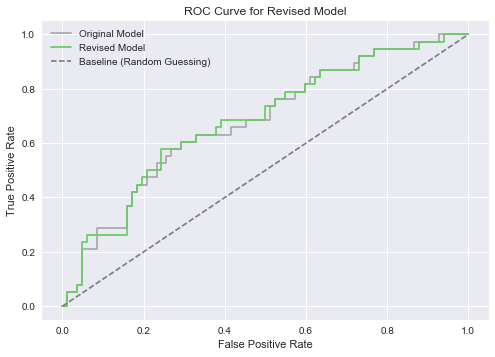

Area Under the Curve: 0.682284980745


In [24]:
# Plot a new ROC curve for the revised model
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, newprobabilities[:,1])

results2 = pd.DataFrame({'False Positive Rate': fpr2, 'True Positive Rate': tpr2})

plt.plot(fpr,tpr,color='darkgray', label="Original Model")
plt.plot(fpr2,tpr2, color='g', label="Revised Model")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline (Random Guessing)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Revised Model')
plt.legend()
plt.show()

print("Area Under the Curve:", metrics.roc_auc_score(y_test2, newprobabilities[:,1]))

Our ROC curve differs slightly from the original model's, and it is, generally speaking, an improvement. Our area under the curve is also better than the original model's.

## Conclusion

We were able to develop a learned logistic regression model that can, with 72.5% accuracy, predict the admission of a candidate into graduate school based on their GRE, GPA, and the rank of their school.